## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [4]:
num_rows = len(df)
print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 69889


`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [5]:
no = (df["converted"] == 0).sum()  # Count where converted is 0
yes = (df["converted"] == 1).sum()  # Count where converted is 1

if no > 0:  # Avoid division by zero
    proportion = yes / no
    print(f"The proportion of converted users (yes to no) is: {proportion:.2f}")
else:
    print(f"The number of 'no' entries is zero, cannot compute proportion")

The proportion of converted users (yes to no) is: 0.15


`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [6]:
# Check if any rows have missing values
missing_values = df.isnull().any(axis=1)  # Check for missing values row-wise

# Count the rows with missing values
rows_with_missing_values = missing_values.sum()

if rows_with_missing_values > 0:
    print(f"Yes, there are {rows_with_missing_values} rows with missing values.")
else:
    print("No, there are no rows with missing values.")

No, there are no rows with missing values.


`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [7]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
# Count the number of visitors from each country
country_counts = df['country'].value_counts()

# Display the counts
print(country_counts)

US    48850
UK    17551
CA     3488
Name: country, dtype: int64


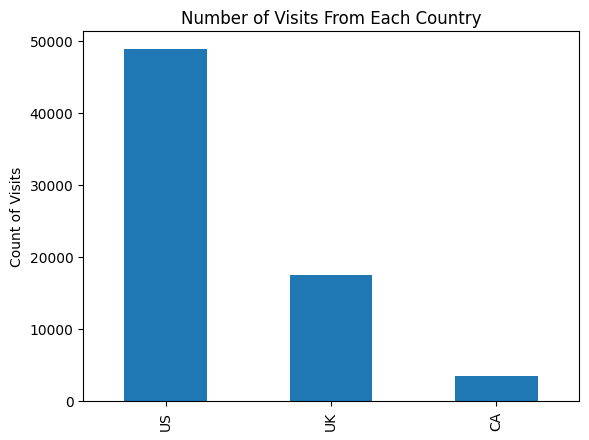

In [8]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [9]:
# Calculate the probability of conversion
total_individuals = len(df)  # Total number of individuals in the dataset
total_conversions = (df["converted"] == 1).sum()  # Total number of conversions (converted == 1)

if total_individuals > 0:
    probability_conversion = total_conversions / total_individuals
    print(f"The probability of conversion is: {probability_conversion:.2%}")
else:
    print("The dataset is empty.")

The probability of conversion is: 13.05%


`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [13]:
control_group = df[df["group"] == "control"]

# Calculate the probability of conversion within the treatment group
total_control = len(control_group)  # Total number of individuals in the treatment group
control_conversions = (control_group["converted"] == 1).sum()
probability_control_conversion = control_conversions / total_control
probability_control_conversion

#df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [14]:
# Filter the dataset for the treatment group
treatment_group = df[df["group"] == "treatment"]

# Calculate the probability of conversion within the treatment group
total_treatment = len(treatment_group)  # Total number of individuals in the treatment group
treatment_conversions = (treatment_group["converted"] == 1).sum()  # Number of conversions in the treatment group

if total_treatment > 0:
    probability_treatment_conversion = treatment_conversions / total_treatment
    print(f"The probability of conversion given the individual is in the treatment group is: {probability_treatment_conversion:.2%}")
else:
    print("There are no individuals in the treatment group.")

The probability of conversion given the individual is in the treatment group is: 15.53%


`d)` Do you see evidence that the treatment is related to higher `converted` rates?

`e)` What is the probability that an individual was in the `treatment`?

In [15]:
treatment_group_count = (df["group"] == "treatment").sum() 

p= treatment_group_count/len(df)
p 

0.5038131894861853

`f)` What is the probability that an individual was from Canada `CA`?

In [16]:
ca = (df["country"] == "CA").sum() 

p= ca/len(df)
p

0.04990771079855199

`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [17]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [18]:
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [19]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [20]:
# Method 2 - quickly calculate using `groupby`
result = df.query('country == "CA"').groupby('group')['converted'].mean()
print(result)




group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64


##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [21]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [22]:
# treatment_converted = 

import numpy as np

# Calculate the mean conversion rate
p_control_treatment_null = df['converted'].mean()

# Determine the number of transactions in the treatment and control groups
n_treatment = df.query('group == "treatment"').shape[0]

# Simulate n_treatment transactions
treatment_converted = np.random.choice(
    [0, 1],  # Possible outcomes
    size=n_treatment,  # Number of samples
    p=[1 - p_control_treatment_null, p_control_treatment_null]  # Probabilities for 0 and 1
)

# Convert to a list
treatment_converted_list = treatment_converted.tolist()

print(treatment_converted_list[:10])  # Display the first 10 elements as an example

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [23]:
# control_converted = 

import numpy as np

# Calculate the mean conversion rate
p_control_treatment_null = df['converted'].mean()

# Determine the number of transactions in the treatment and control groups
n_control = df.query('group == "control"').shape[0]

# Simulate n_treatment transactions
control_converted = np.random.choice(
    [0, 1],  # Possible outcomes
    size=n_control,  # Number of samples
    p=[1 - p_control_treatment_null, p_control_treatment_null]  # Probabilities for 0 and 1
)

# Convert to a list
control_converted_list = treatment_converted.tolist()

print(control_converted_list[:10])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [25]:


# Calculate proportions
p_treatment_simulated = np.mean(treatment_converted)  # Proportion of 1's in treatment
p_control_simulated = np.mean(control_converted)  # Proportion of 1's in control

# Estimate p_treatment - p_control under the null
difference_estimate = p_treatment_simulated - p_control_simulated

print(f"Estimated difference under the null: {difference_estimate:.4f}")

Estimated difference under the null: 0.0001


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [27]:
p_diffs = []
# for _ in range(500):
    # simulate the treatment and control converted arrays

    # calculate p_treatment and p_control under the null

    # calculate the difference between p_treatment_null and p_control_null

    # add p_diff to the p_diffs array
    
    
import numpy as np

# Define parameters
n_simulations = 500  # Number of simulations
p_control_treatment_null = df['converted'].mean()  # Overall conversion rate under the null
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

# Initialize an array to store the differences
p_diffs = np.zeros(n_simulations)

# Simulate 500 differences
for i in range(n_simulations):
    # Simulate treatment group conversions
    treatment_converted = np.random.choice(
        [0, 1],
        size=n_treatment,
        p=[1 - p_control_treatment_null, p_control_treatment_null]
    )
    # Simulate control group conversions
    control_converted = np.random.choice(
        [0, 1],
        size=n_control,
        p=[1 - p_control_treatment_null, p_control_treatment_null]
    )
    # Calculate proportions
    p_treatment_simulated = np.mean(treatment_converted)
    p_control_simulated = np.mean(control_converted)
    # Store the difference
    p_diffs[i] = p_treatment_simulated - p_control_simulated

# Display the first 10 simulated differences as an example
print(p_diffs[:10])

[-0.00341312  0.00545337  0.00243075  0.00025531 -0.00083001  0.0009334
  0.00287375  0.00301884  0.00271606 -0.00285605]


`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [ ]:
# p_diffs = pd.Series(p_diffs)
# p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

p_control_treatment_null: 0.1305
n_treatment: 35211
n_control: 34678


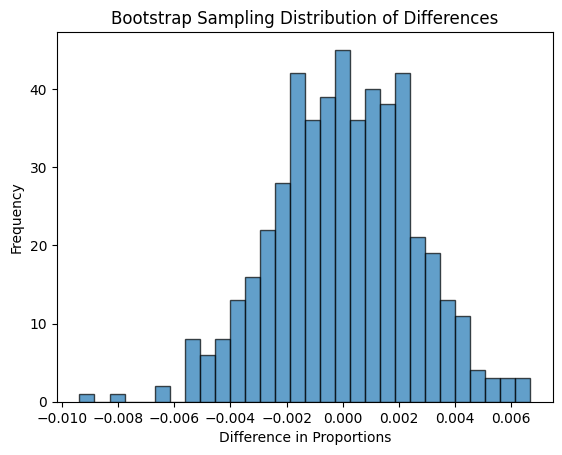

In [48]:
p_control_treatment_null = df['converted'].mean()
print(f"p_control_treatment_null: {p_control_treatment_null:.4f}")

n_treatment = df.query('group == "treatment"').shape[0]
print(f"n_treatment: {n_treatment}")

n_control = df.query('group == "control"').shape[0]
print(f"n_control: {n_control}")

import matplotlib.pyplot as plt

# Plot the bootstrap sampling distribution
plt.hist(p_diffs, bins=30, alpha=0.7, edgecolor='k')
plt.title("Bootstrap Sampling Distribution of Differences")
plt.xlabel("Difference in Proportions")
plt.ylabel("Frequency")
plt.show()

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**Your Answer Here**

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Your Answer Here**

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [28]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page,treatment
0,UK,control,0,1,0,0
1,US,treatment,1,1,1,1
2,UK,treatment,0,1,1,1
3,UK,control,0,1,0,0
4,UK,treatment,0,1,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [14]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [15]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [16]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                0.007175
Time:                        16:36:40   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**Your Answer Here.**

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [17]:
### Create the necessary dummy variables
import pandas as pd

# Create the y response column
y = df['converted']

# One-hot encode the 'group' column (treatment vs. control)
group_dummies = pd.get_dummies(df['group'], drop_first=True)

# One-hot encode the 'country' column (US, UK, CA)
country_dummies = pd.get_dummies(df['country'], drop_first=False)

# Combine the features into the X matrix
X = pd.concat([group_dummies, country_dummies], axis=1)

# Rename columns for clarity
X.columns = ['treatment', 'CA', 'UK', 'US']

# Display the first few rows of X and y
print("X Matrix:")
print(X.head())
print("\ny Response Column:")
print(y.head())

X Matrix:
   treatment  CA  UK  US
0          0   0   1   0
1          1   0   0   1
2          1   0   1   0
3          0   0   1   0
4          1   0   1   0

y Response Column:
0    0
1    1
2    0
3    0
4    0
Name: converted, dtype: int64


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [24]:
# X = 
# y = 

import pandas as pd

# Create the y response column
y = df['converted']

# Encode the 'group' column (binary: 1 for treatment, 0 for control)
df['treatment'] = (df['group'] == 'treatment').astype(int)

# One-hot encode the 'country' column (US, UK, CA)
country_dummies = pd.get_dummies(df['country'], prefix='country')

# Combine the encoded features into the X matrix
X = pd.concat([df['treatment'], country_dummies], axis=1)

# Display the first few rows of X and y
print("X Matrix:")
print(X.head())
print("\ny Response Column:")
print(y.head())


# Calculate the observed difference between treatment and control
observed_treatment_conversion = df.query('group == "treatment"')["converted"].mean()
observed_control_conversion = df.query('group == "control"')["converted"].mean()
observed_difference = observed_treatment_conversion - observed_control_conversion

# Calculate the proportion of differences under the null that are larger than the observed difference
proportion_greater = (p_diffs > observed_difference).mean()

print(f"Observed difference: {observed_difference:.4f}")
print(f"Proportion of null differences larger than the observed difference: {proportion_greater:.4f}")


X Matrix:
   treatment  country_CA  country_UK  country_US
0          0           0           1           0
1          1           0           0           1
2          1           0           1           0
3          0           0           1           0
4          1           0           1           0

y Response Column:
0    0
1    1
2    0
3    0
4    0
Name: converted, dtype: int64
Observed difference: 0.0501
Proportion of null differences larger than the observed difference: 0.0000


`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [20]:
import statsmodels.api as sm

# Add a constant to the X matrix for the intercept term
X_with_const = sm.add_constant(X)

# Fit a logistic regression model
model = sm.Logit(y, X_with_const).fit()

# Print the summary of the model
print(model.summary())

observed_treatment_conversion = df.query('group == "treatment"')["converted"].mean()
observed_control_conversion = df.query('group == "control"')["converted"].mean()
observed_difference = observed_treatment_conversion - observed_control_conversion
print(f"Observed difference: {observed_difference:.4f}")

proportion_greater = (p_diffs > observed_difference).mean()
print(f"Proportion of null differences larger than observed difference: {proportion_greater:.4f}")

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69884
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                0.007312
Time:                        17:15:20   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 2.222e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6249   3.21e+05  -5.06e-06      1.000   -6.29e+05    6.29e+05
treatment      0.4466      0.

`d)` Provide the summary of your model below.

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**Your Answer Here**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.